<a href="https://colab.research.google.com/github/Rny0Raneem/AI_Project/blob/main/LLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikeras

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve, average_precision_score)

from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


In [ ]:
%cd /content/drive/MyDrive/
# load dataset
data = pd.read_csv('sampled_cardio_data.csv', encoding='utf-8')

/content/drive/MyDrive


In [ ]:
# Map gender to binary (0 and 1)
data['gender'] = data['gender'].map({1: 0, 2: 1})


# Step 1: Split the data
X = data.drop(['cardio','id'], axis=1)  # Features
y = data['cardio']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Feature selection by removing personal info ('age', 'gender', 'height', 'weight')

y_subset = data['cardio']
X_subset = data.drop(columns=['cardio', 'age', 'gender', 'height', 'weight', 'id'])  # Drop target and unwanted columns

# Step 2: Split the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

#Logistic Regression

In [ ]:
# Function to create and return the logistic regression model
def create_model_Logistic_Regression(max_iter=100):
    model = LogisticRegression(max_iter=max_iter)
    return model

In [ ]:
# Function to perform hyperparameter tuning using GridSearchCV
def tune_model_Logistic_Regression(X_train, y_train):
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}
    model = create_model_Logistic_Regression()  # Use the model creation function
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

    # Measure the time taken to perform grid search
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    best_score = grid_search.best_score_
    print(f"Best C value: {best_C}")
    print(f"Best cross-validated accuracy on training set: {best_score}")

    return grid_search.best_estimator_

In [ ]:
# Function to evaluate the model
def evaluate_model_Logistic_Regression(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

    # Print metrics
    print(f'Test Accuracy: {metrics["accuracy"]:.4f}')
    print(f'Precision: {metrics["precision"]:.4f}')
    print(f'Recall: {metrics["recall"]:.4f}')
    print(f'F1 Score: {metrics["f1_score"]:.4f}')
    print('Confusion Matrix:')
    print(metrics["confusion_matrix"])

    # Display the classification report
    print("\nClassification Report:")
    print(class_report)

    return y_pred, metrics


In [ ]:
# Function to plot ROC Curve
def plot_roc_curve_Logistic_Regression(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Function to plot Precision-Recall Curve
def plot_precision_recall_curve_Logistic_Regression(y_test, y_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    average_precision = average_precision_score(y_test, y_proba)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix_Logistic_Regression(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Tune model
best_model = tune_model_Logistic_Regression(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

In [ ]:
# Evaluate model
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC and PR curves
evaluate_model_Logistic_Regression(best_model, X_test, y_test)

Test Accuracy: 0.7250
Precision: 0.7739
Recall: 0.7032
F1 Score: 0.7368
Confusion Matrix:
[[136  45]
 [ 65 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       181
           1       0.77      0.70      0.74       219

    accuracy                           0.72       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.73       400



(array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 

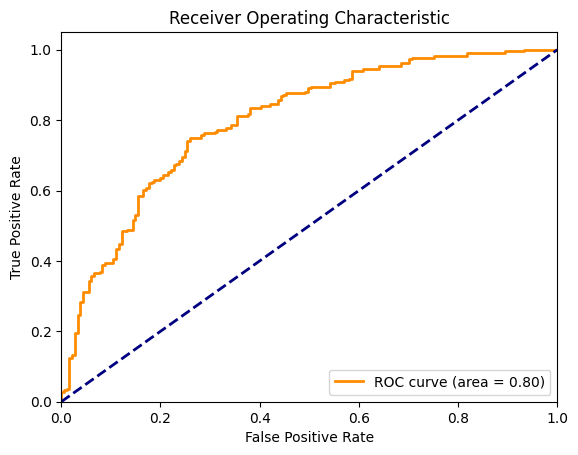

In [ ]:
 # Plot ROC Curve
plot_roc_curve_Logistic_Regression(y_test, y_test_proba)

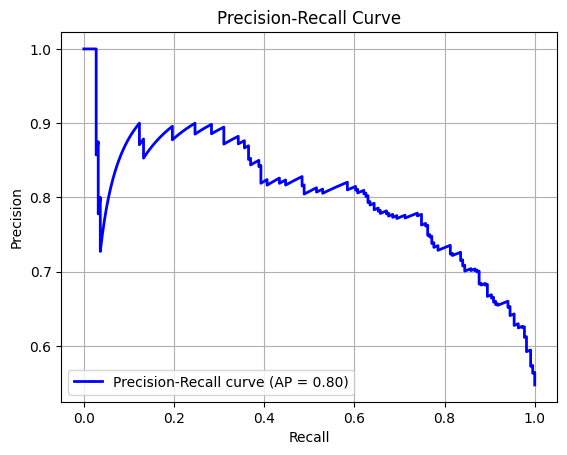

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall_curve_Logistic_Regression(y_test, y_test_proba)

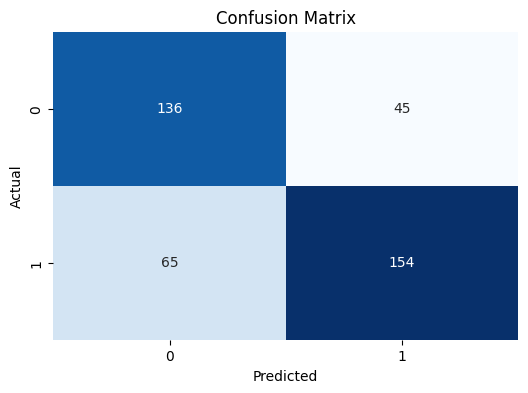

In [ ]:
y_test_pred = best_model.predict(X_test)
plot_confusion_matrix_Logistic_Regression(y_test, y_test_pred)

In [ ]:
# Tune model2
best_model2 = tune_model_Logistic_Regression(X_train_subset, y_train_subset)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

In [ ]:
# Evaluate model
y_test_proba2 = best_model2.predict_proba(X_test_subset)[:, 1]  # Get probabilities for ROC and PR curves
evaluate_model_Logistic_Regression(best_model2, X_test_subset, y_test_subset)

Test Accuracy: 0.7225
Precision: 0.8068
Recall: 0.6484
F1 Score: 0.7190
Confusion Matrix:
[[147  34]
 [ 77 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       181
           1       0.81      0.65      0.72       219

    accuracy                           0.72       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.74      0.72      0.72       400



(array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 

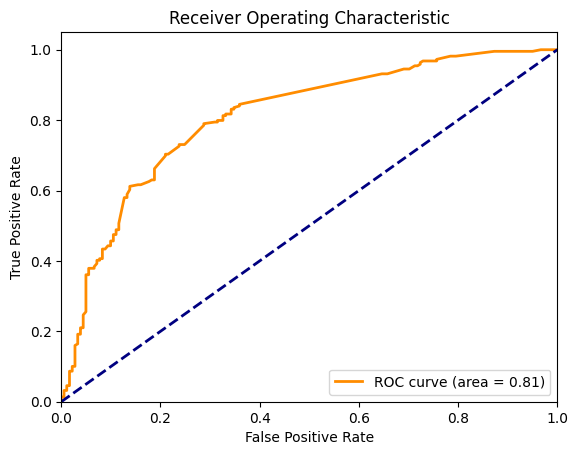

In [ ]:
#X_train_subset, X_test_subset, y_train_subset, y_test_subset
# Plot ROC Curve
plot_roc_curve_Logistic_Regression(y_test_subset, y_test_proba2)

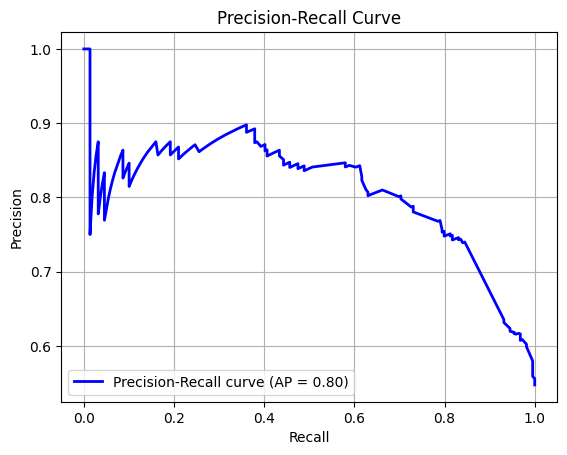

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall_curve_Logistic_Regression(y_test_subset, y_test_proba2)

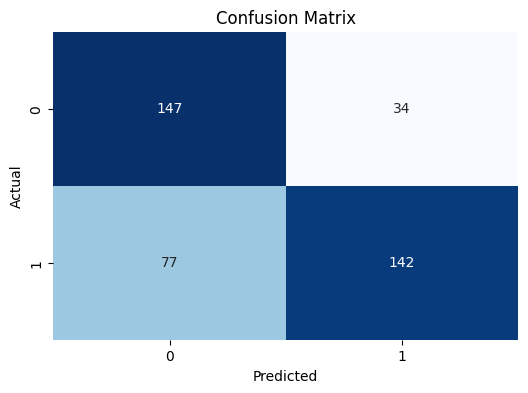

In [ ]:
y_test_pred2 = best_model2.predict(X_test_subset)
plot_confusion_matrix_Logistic_Regression(y_test_subset, y_test_pred2)

#SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Dataset
data = pd.read_csv('sampled_cardio_data.csv', encoding='utf-8')

In [ ]:

# Function for SVM Training with Grid Search
def train_svm(X_train, y_train):
    param_grid = {
        'C': [ 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear']
    }
    svm = SVC()
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)

    # Print the best value of C
    print(f"Best choice of C: {grid_search.best_params_['C']}")

    return grid_search.best_estimator_, grid_search.best_score_


def evaluate_and_plot(model, X_test, y_test, X_train, y_train):
    # Generate predictions and calculate metrics
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot Decision Boundary using PCA (reduce to 2D)
    pca = PCA(n_components=2)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=20, alpha=0.7)
    plt.title("PCA of Full/Subset Data with SVM Decision Boundary")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

    # Generate a mesh grid for the decision boundary
    x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
    y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='o')
    plt.show()

    # Plot ROC Curve
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()




Evaluating SVM on Full Feature Set...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END ..

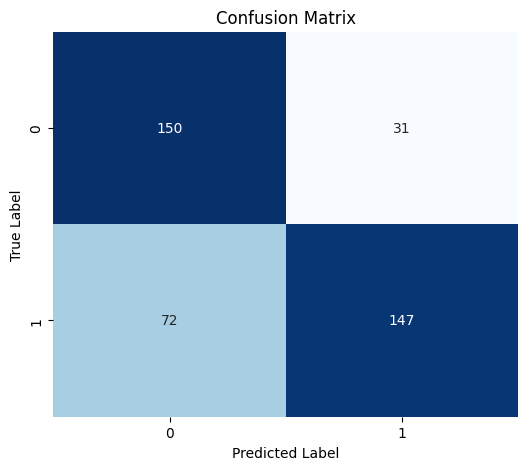

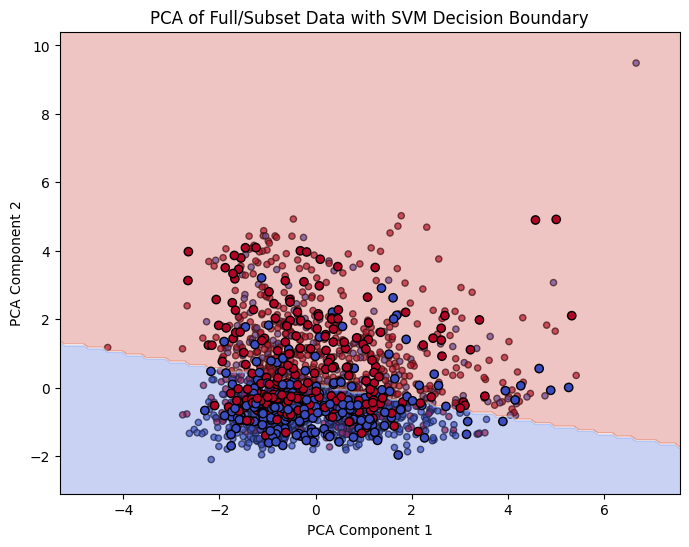

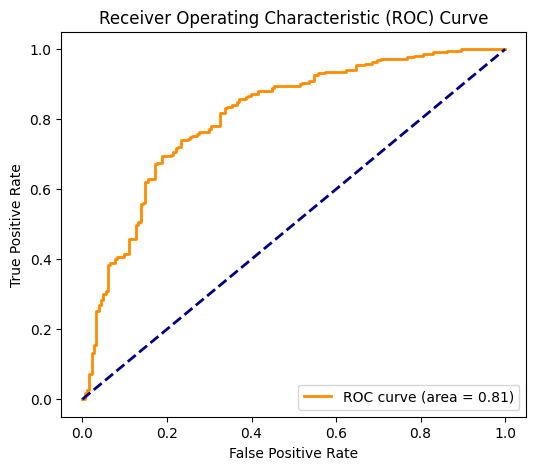

In [ ]:
# 1. Full Feature Set
print("Evaluating SVM on Full Feature Set...")
best_model_full, best_score_full = train_svm(X_train, y_train)

print(f"Best Cross-Validated Accuracy on Training Set (Full Feature Set): {best_score_full:.4f}")
evaluate_and_plot(best_model_full, X_test, y_test, X_train, y_train)


Evaluating SVM on Subset Feature Set...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END

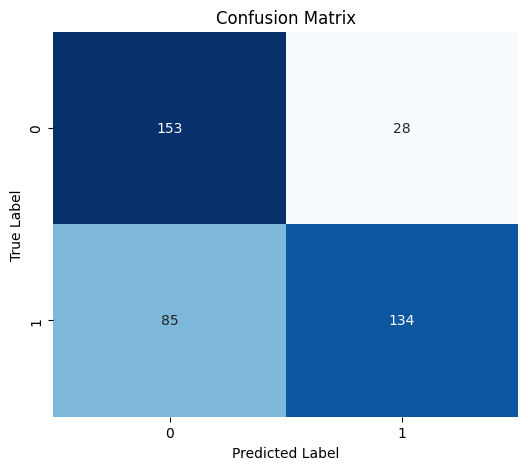

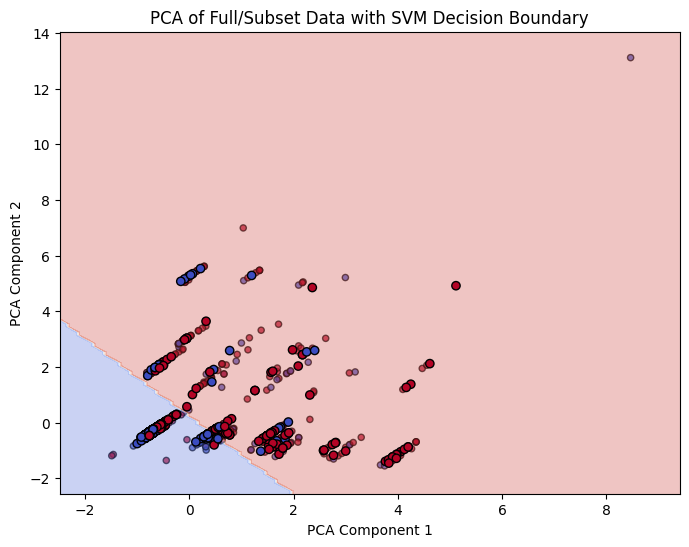

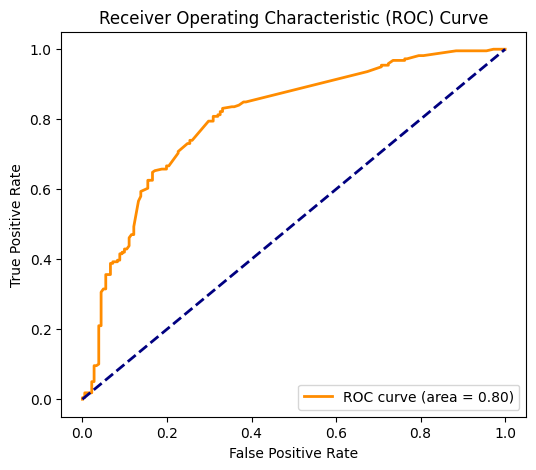

In [ ]:
# 2. Subset Feature Set
print("\nEvaluating SVM on Subset Feature Set...")
best_model_subset, best_score_subset = train_svm(X_train_subset, y_train_subset)

print(f"Best Cross-Validated Accuracy on Training Set (Subset Feature Set): {best_score_subset:.4f}")
evaluate_and_plot(best_model_subset, X_test_subset, y_test_subset, X_train_subset, y_train_subset)

#SVM Conclusion
The Full Feature Set model is the better choice overall as it has higher test accuracy, recall, and F1 score. It’s more effective at correctly classifying both positive and negative cases while maintaining a good balance between precision and recall.

# Neural Network

In [ ]:
def create_model(activation='relu', dropout_rate=0.2, input_dim=None):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation=activation))  # First hidden layer
    model.add(Dropout(dropout_rate))  # Dropout layer after the first hidden layer
    model.add(Dense(32, activation=activation))  # Second hidden layer
    model.add(Dropout(dropout_rate))  # Dropout layer after the second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:


def tune_neural_network(xtrain, ytrain, xtest, ytest):


    """
    Function to perform hyperparameter tuning for a neural network model using GridSearchCV.

    Parameters:
    - xtrain: Training features
    - ytrain: Training labels
    - xtest: testing features
    - ytest: testing labels

    Returns:
    - best_params: Best hyperparameters found
    - best_model: The trained model with the best parameters
    - history: Training history object
    """


    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

    # Set up GridSearchCV for hyperparameter tuning
    model = KerasClassifier(model=create_model,verbose=0, input_dim=xtrain.shape[1])


    param_grid = {
        'model__activation': ['relu', 'tanh'],
        'model__dropout_rate': [0.2, 0.3, 0.5],
        'batch_size': [16, 32],
        'epochs': [50, 100]
    }

    # Run GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
    grid_result = grid.fit(xtrain, ytrain)

    # Retrieve the best parameters
    best_params = grid_result.best_params_
    print(f'Best Parameters: {best_params}')

    # Train the best model with the best parameters to get history
    best_model = create_model(activation=best_params['model__activation'], dropout_rate=best_params['model__dropout_rate'])

    best_model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Retrain using the best parameters to capture training history
    history = best_model.fit(xtrain, ytrain,
                            batch_size=best_params['batch_size'],
                            epochs=best_params['epochs'],
                            validation_data=(xtest, ytest),
                            callbacks=[early_stopping],
                            verbose=1)

    return best_params, best_model, history


In [ ]:
def evaluate_model(best_model, X_test, y_test, history, threshold=0.4):
    """
    Function to evaluate the neural network model on the test set and plot training results.

    Parameters:
    - best_model: The trained model to evaluate
    - X_test: Test features
    - y_test: Test labels
    - history: Training history object from model fitting
    - threshold: Threshold for classifying predictions (default is 0.4)

    Returns:
    - metrics: Dictionary containing accuracy, precision, recall, F1 score, and confusion matrix
    """
    # Evaluate on the test set
    y_pred_probs = best_model.predict(X_test)
    y_pred = (y_pred_probs > threshold).astype("int32")

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print metrics
    print(f'Test Accuracy: {metrics["accuracy"]:.4f}')
    print(f'Precision: {metrics["precision"]:.4f}')
    print(f'Recall: {metrics["recall"]:.4f}')
    print(f'F1 Score: {metrics["f1"]:.4f}')
    print('Confusion Matrix:')
    print(metrics["conf_matrix"])

    # Display the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()
    print("This plot shows how the model's accuracy on the training and validation sets evolved over each epoch. It helps to assess if the model is overfitting (validation accuracy decreases as training accuracy increases) or underfitting (both accuracies are low).\n\n\n\n")

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()
    print("This plot displays the model's loss on the training and validation sets over each epoch. A decreasing loss indicates that the model is learning, while a rising validation loss may indicate overfitting.\n\n\n\n")

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics["conf_matrix"], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("The confusion matrix provides a summary of prediction outcomes, showing how many instances were correctly or incorrectly classified for each class. It helps identify specific areas where the model may be making errors.\n\n\n\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute the AUC

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    print("The ROC curve illustrates the trade-off between the true positive rate and false positive rate at different classification thresholds. The closer the curve follows the left and top borders, the better the model performs. The area under the curve (AUC) quantifies the overall performance, where higher values indicate better distinguishing capability between classes.\n\n\n\n")

    return metrics


## hyperparameter tuning tuning and model bulding using all features

In [ ]:
best_params1, best_model1, history1 = tune_neural_network(X_train, y_train, X_test, y_test)


Best Parameters: {'batch_size': 16, 'epochs': 50, 'model__activation': 'tanh', 'model__dropout_rate': 0.5}


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_219 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_147 (Dropout)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5319 - loss: 0.7383 - val_accuracy: 0.6925 - val_loss: 0.5702
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 0.6286 - val_accuracy: 0.7300 - val_loss: 0.5539
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6906 - loss: 0.6127 - val_accuracy: 0.7325 - val_loss: 0.5458
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7111 - loss: 0.5871 - val_accuracy: 0.7475 - val_loss: 0.5390
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6988 - loss: 0.5907 - val_accuracy: 0.7400 - val_loss: 0.5388
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.5688 - val_accuracy: 0.7525 - val_loss: 0.5363
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7148 - loss: 0.5858 - val_accuracy: 0.7400 - val_loss: 0.5359
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7319 - loss: 0.5609 - val_accuracy: 0.

### Visulazation

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.7500
Precision: 0.7532
Recall: 0.8082
F1 Score: 0.7797
Confusion Matrix:
[[123  58]
 [ 42 177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       181
           1       0.75      0.81      0.78       219

    accuracy                           0.75       400
   macro avg       0.75      0.74      0.75       400
weighted avg       0.75      0.75      0.75       400



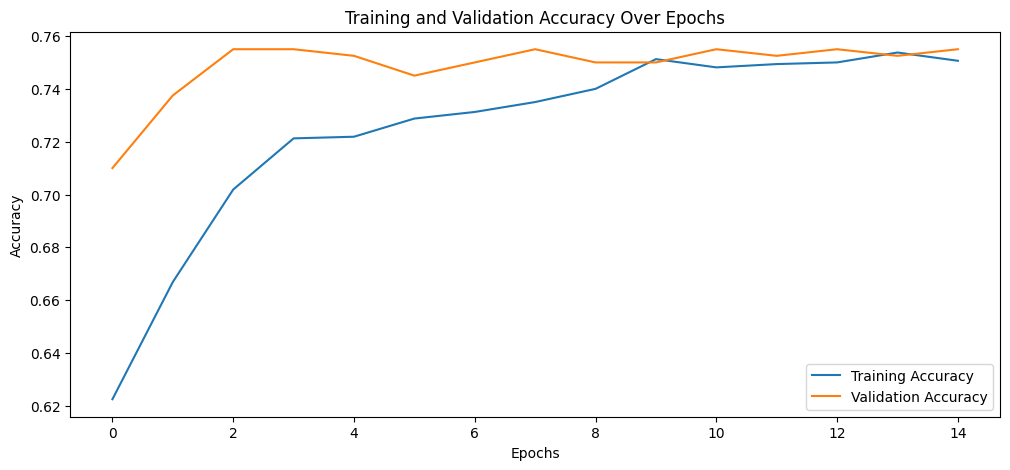

This plot shows how the model's accuracy on the training and validation sets evolved over each epoch. It helps to assess if the model is overfitting (validation accuracy decreases as training accuracy increases) or underfitting (both accuracies are low).






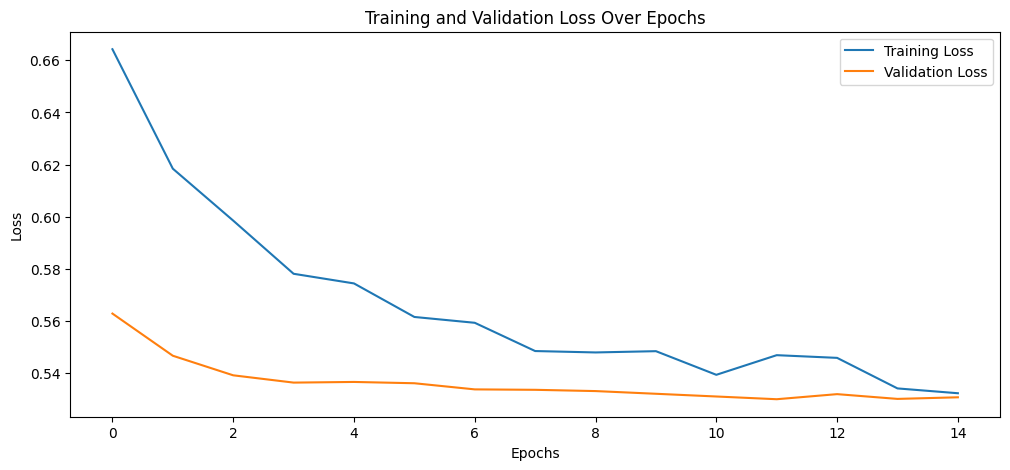

This plot displays the model's loss on the training and validation sets over each epoch. A decreasing loss indicates that the model is learning, while a rising validation loss may indicate overfitting.






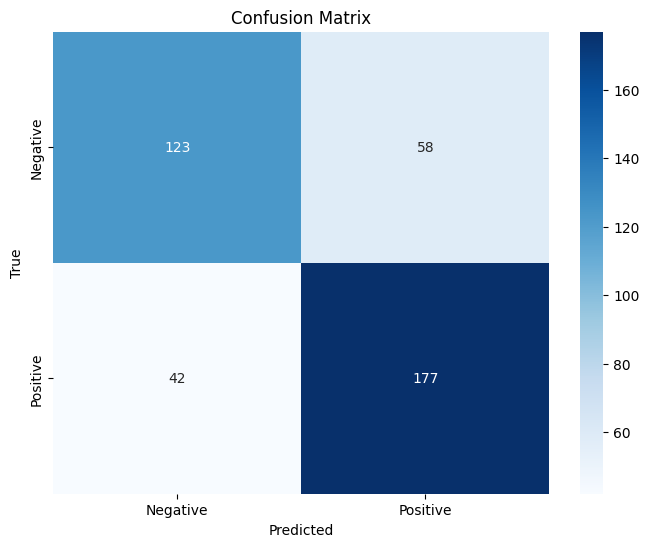

The confusion matrix provides a summary of prediction outcomes, showing how many instances were correctly or incorrectly classified for each class. It helps identify specific areas where the model may be making errors.






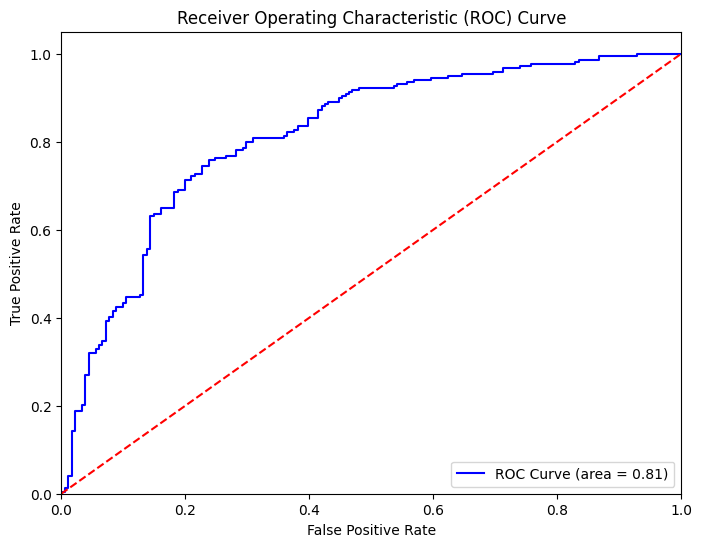

The ROC curve illustrates the trade-off between the true positive rate and false positive rate at different classification thresholds. The closer the curve follows the left and top borders, the better the model performs. The area under the curve (AUC) quantifies the overall performance, where higher values indicate better distinguishing capability between classes.






In [ ]:
metrics = evaluate_model(best_model1, X_test, y_test, history1)

## interpreting results

Based on the Training and Validation Accuracy Over Epochs and Training and Validation Loss Over Epochs graphs, the model does not appear to be underfitting or overfitting, as the training and validation results are closely aligned in both graphs. This suggests that the model is generalizing well to new data.

The confusion matrix indicates that most instances were correctly classified, with a notably low number of false negatives—a desirable outcome for a disease detection model, where minimizing missed cases (false negatives) is crucial. This reduction in false negatives directly contributes to a higher recall (0.80), further emphasizing the model's effectiveness in identifying positive cases.

The ROC curve, with an AUC of 0.81, shows that the model has good discriminatory ability between positive and negative classes. A higher AUC indicates a better performance.

## hyperparameter tuning tuning and model bulding using a subset of features

In [ ]:
best_params2, best_model2, history2 = tune_neural_network(X_train_subset, y_train_subset, X_test_subset, y_test_subset)


Best Parameters: {'batch_size': 16, 'epochs': 100, 'model__activation': 'tanh', 'model__dropout_rate': 0.5}


Model: "sequential_538"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1180 (Dense)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_786 (Dropout)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1181 (Dense)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_787 (Dropout)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1182 (Dense)                   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5588 - loss: 0.7155 - val_accuracy: 0.7125 - val_loss: 0.5802
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7011 - loss: 0.5982 - val_accuracy: 0.7225 - val_loss: 0.5563
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.6029 - val_accuracy: 0.7325 - val_loss: 0.5470
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5731 - val_accuracy: 0.7325 - val_loss: 0.5485
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5742 - val_accuracy: 0.7325 - val_loss: 0.5484
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5624 - val_accuracy: 0.7325 - val_loss: 0.5453
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5477 - val_accuracy: 0.7350 - val_loss: 0.5436
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7446 - loss: 0.5618 - val_accu

### Visualazation

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.7550
Precision: 0.7642
Recall: 0.7991
F1 Score: 0.7812
Confusion Matrix:
[[127  54]
 [ 44 175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       181
           1       0.76      0.80      0.78       219

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.76      0.75       400



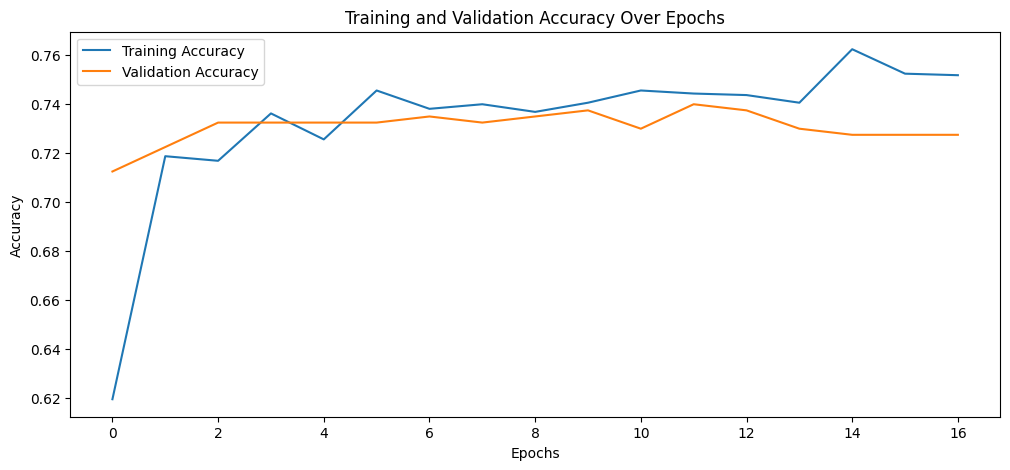

This plot shows how the model's accuracy on the training and validation sets evolved over each epoch. It helps to assess if the model is overfitting (validation accuracy decreases as training accuracy increases) or underfitting (both accuracies are low).






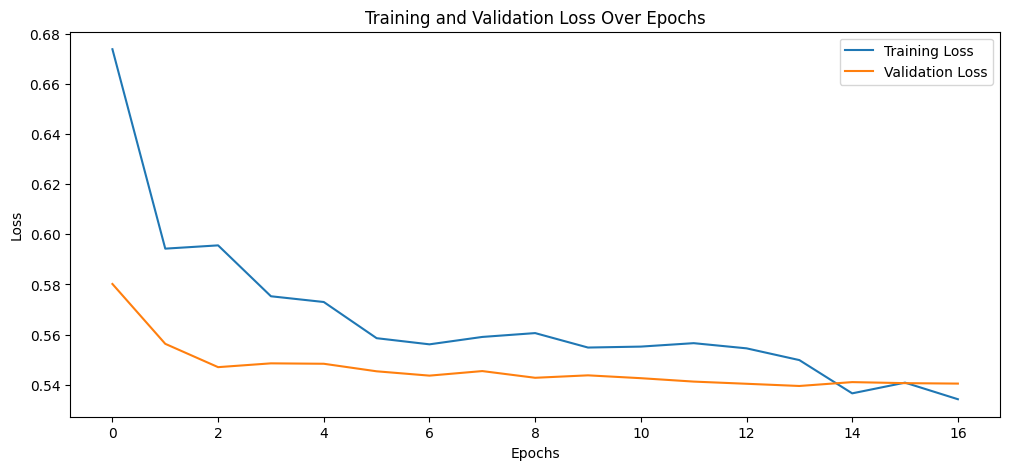

This plot displays the model's loss on the training and validation sets over each epoch. A decreasing loss indicates that the model is learning, while a rising validation loss may indicate overfitting.






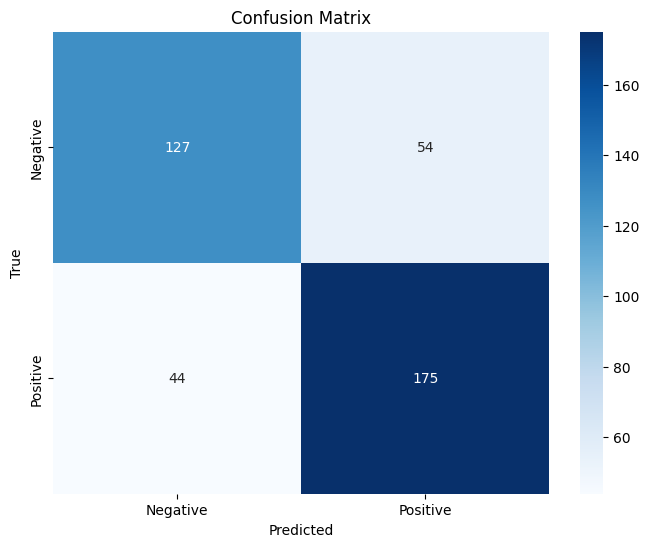

The confusion matrix provides a summary of prediction outcomes, showing how many instances were correctly or incorrectly classified for each class. It helps identify specific areas where the model may be making errors.






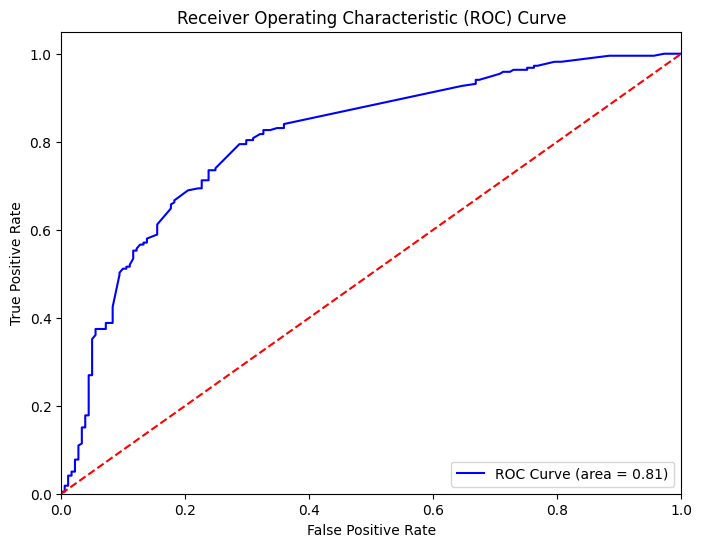

The ROC curve illustrates the trade-off between the true positive rate and false positive rate at different classification thresholds. The closer the curve follows the left and top borders, the better the model performs. The area under the curve (AUC) quantifies the overall performance, where higher values indicate better distinguishing capability between classes.






In [ ]:
metrics2 = evaluate_model(best_model2, X_test_subset, y_test_subset, history2)

## interpreting results



The Training and Validation Accuracy Over Epochs and Training and Validation Loss Over Epochs graphs for this model are closely similar to the previous model, with training and validation results closely aligned. This suggests that, like the first model, it is generalizing well without signs of underfitting or overfitting.

The confusion matrix shows accurate classifications, with a low count of false negatives—essential for disease detection, where identifying cases correctly is crucial. Similar to the prevoius model, this model has a notable high recall value of 0.79.

The ROC curve, with an AUC of 0.81, also mirrors the first model's performance, indicating strong discrimination between classes and a balanced sensitivity-specificity trade-off.
